In [116]:
import pandas as pd
df = pd.read_csv('adult.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [118]:
df['income'].value_counts(normalize=True)

income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64

In [120]:
import numpy as np
df['income'] = np.where(df['income'] == '>50K', 'high', 'low')
df['income'].value_counts(normalize = True)

income
low     0.760718
high    0.239282
Name: proportion, dtype: float64

In [122]:
df = df.drop(columns = 'fnlwgt')

In [124]:
df_tmp = df[['sex']]
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [126]:
df_tmp['sex'].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [128]:
#df_tmp의 문자 타입 변수에 원핫 인코딩 적용
df_tmp = pd.get_dummies(df_tmp, dtype='uint8')
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex_Female  48842 non-null  uint8
 1   sex_Male    48842 non-null  uint8
dtypes: uint8(2)
memory usage: 95.5 KB


In [130]:
df_tmp[['sex_Female', 'sex_Male']].head()

,sex_Female,sex_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [146]:
target = df['income']  # 타깃 변수 저장
df = df.drop(columns='income')  # 타깃 변수 제거

df = pd.get_dummies(df, dtype='uint8')  # 원핫 인코딩 실행

df['income'] = target  # 타깃 변수 복원
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 108 entries, age to income
dtypes: bool(102), int64(5), object(1)
memory usage: 7.0+ MB


In [148]:
import numpy as np
df.info(max_cols = np.inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 108 columns):
 #    Column                                     Non-Null Count  Dtype 
---   ------                                     --------------  ----- 
 0    age                                        48842 non-null  int64 
 1    education_num                              48842 non-null  int64 
 2    capital_gain                               48842 non-null  int64 
 3    capital_loss                               48842 non-null  int64 
 4    hours_per_week                             48842 non-null  int64 
 5    workclass_?                                48842 non-null  bool  
 6    workclass_Federal-gov                      48842 non-null  bool  
 7    workclass_Local-gov                        48842 non-null  bool  
 8    workclass_Never-worked                     48842 non-null  bool  
 9    workclass_Private                          48842 non-null  bool  
 10   workclass_Self-emp-i

In [150]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                    test_size = 0.3,
                                    stratify = df['income'],
                                    random_state = 1234)

In [152]:
df_train.shape

(34189, 108)

In [154]:
df_test.shape

(14653, 108)

In [156]:
df_train['income'].value_counts(normalize = True)

income
low     0.760713
high    0.239287
Name: proportion, dtype: float64

In [160]:
df_test['income'].value_counts(normalize = True)

#stratify를 설정해둔 덕분에 타켓 변수의 범주별 비율이 유사하다.

income
low     0.760732
high    0.239268
Name: proportion, dtype: float64

In [162]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1234,
                                 max_depth = 3)

In [164]:
train_x = df_train.drop(columns = 'income')
train_y = df_train['income']

model = clf.fit(X = train_x, y=train_y)

In [166]:
test_x = df_test.drop(columns = 'income')
test_y = df_test['income']

In [172]:
df_test['pred'] = model.predict(test_x)
df_test

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income,pred
11712,58,10,0,0,60,False,False,False,False,False,...,False,False,False,False,False,True,False,False,low,low
24768,39,10,0,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,False,low,low
26758,31,4,0,0,20,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
14295,23,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
3683,24,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,24,13,0,0,30,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
48445,35,13,10520,0,45,False,False,False,False,True,...,False,False,False,False,False,True,False,False,high,high
19639,41,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,high,low
21606,29,4,0,0,30,False,False,False,False,True,...,False,False,False,False,False,False,False,False,low,low


In [174]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = df_test['income'],
                           y_pred = df_test['pred'],
                           labels = ['high', 'low'])
conf_mat

array([[ 1801,  1705],
       [  582, 10565]])

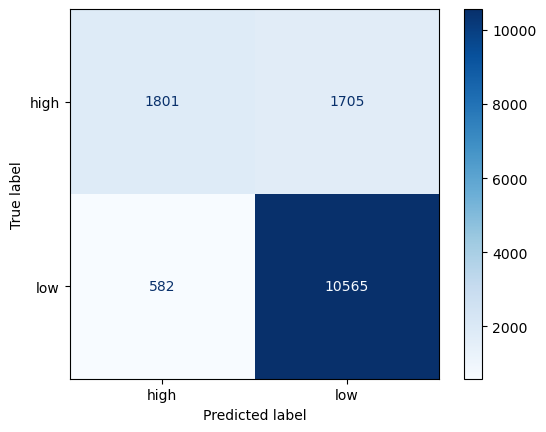

In [184]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat,
                          display_labels = ('high', 'low'))

p.plot(cmap = 'Blues')

In [186]:
#confusion matrix에서 행은 실제 빈도, 열은 모델이 예측한 빈도 의미

In [188]:
#성능 평가 지표 구하기
#1. accuracy 구하기

import sklearn.metrics as metrics
metrics.accuracy_score(y_true = df_test['income'],
                      y_pred = df_test['pred'])

0.8439227461953184

In [194]:
#2. precision 구하기

metrics.precision_score(y_true = df_test['income'],
                      y_pred = df_test['pred'],
                      pos_label = 'high')

0.7557700377675199

In [198]:
#3. recall 구하기
metrics.recall_score(y_true = df_test['income'],
                    y_pred = df_test['pred'],
                    pos_label = 'high')

0.5136908157444381

In [201]:
#F1 score - recall과 precision의 조화평균

metrics.f1_score(y_true = df_test['income'],
                y_pred = df_test['pred'],
                pos_label = 'high')

0.6116488368143997